### Generating Plots for Paper

In [14]:
#usual procedure...
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle
import matplotlib.ticker as ticker

from nuflux import plot_tools as pt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
directory = 'plots'
os.path.join(os.getcwd(), directory)

'/Users/mhostert/Repos/BIN_MC-1/plots'

In [130]:
Nevents = 1e5
# DIREC = 'GENANA'
DIREC = None
# version = 'old_Aug6/'
version = ''
data1 = dg.load_data(f'{version}mucols2numu.txt', n_events = Nevents, direc = DIREC) #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data(f'{version}mucols2nue.txt', n_events = Nevents, direc = DIREC)
data = pd.concat([data1, data2], axis = 0)
data11 = dg.load_data(f'{version}mokhovnumu.txt', n_events = Nevents, direc = DIREC) #this is my variable for the directory in which my .txt files are.
data21 = dg.load_data(f'{version}mokhovnue.txt', n_events = Nevents, direc = DIREC)
datam = pd.concat([data11, data21], axis = 0)
datat = dg.load_data(f'{version}muTs.txt', n_events = Nevents, direc = DIREC) 

Loading generated data for a IMCC-II experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1433: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a IMCC-II experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1433: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1433: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1433: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a μTRISTAN (s) experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1433: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!


In [132]:
data[(data['Name'] == 'e+') | (data['Name'] == 'e-')][]

,DComp,nu_E,Particle,Name,E,px,py,pz,w
6991,MD,1690.94,numu,e-,6.61311,0.067787,0.046222,6.6126,287300.0
28883,MD,1117.06,numu,e-,780.14000,-0.174937,0.458118,780.1400,287300.0
30542,MD,1428.94,numu,e-,233.52400,0.121199,-0.430080,233.5240,287300.0
40656,MD,1572.48,numu,e-,495.10400,-0.588781,0.004038,495.1040,287300.0
44160,MD,1933.74,numu,e-,942.58400,-0.617871,-0.334653,942.5840,287300.0
...,...,...,...,...,...,...,...,...,...
910821,NO,3222.56,nuebar,e+,2887.38000,14.879200,-3.062290,2887.3400,61200.0
910822,NO,1593.69,nuebar,e+,1241.40000,11.474700,2.273080,1241.3500,61200.0
910823,NO,1796.74,nuebar,e+,1580.55000,5.890200,7.107260,1580.5200,61200.0
910824,NO,2578.73,nuebar,e+,2115.91000,-11.272000,-2.986910,2115.8800,61200.0


In [137]:
mus_mucol = (data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')])
es_mucol = (data[(data['Name'] == 'e-') | (data['Name'] == 'e+')])
nus_mucol = {}
nus_mucol['Enue'] = data[(data['Name'] == 'e+') | (data['Name'] == 'e-')]['nu_E']
nus_mucol['wnue'] = data[(data['Name'] == 'e+') | (data['Name'] == 'e-')]['w']
nus_mucol['Enumu'] = data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')]['nu_E']
nus_mucol['wnumu'] = data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')]['w']
nus_mucol['E'] = data['nu_E']
nus_mucol['w'] = data['w']

mus_mokhov = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])
es_mokhov = (datam[(datam['Name'] == 'e-') | (datam['Name'] == 'e+')])
nus_mokhov = {}
nus_mokhov['Enue'] = (datam[(datam['Name'] == 'e+') | (datam['Name'] == 'e-')])['nu_E']
nus_mokhov['wnue'] = (datam[(datam['Name'] == 'e+') | (datam['Name'] == 'e-')])['w']
nus_mokhov['Enumu'] = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])['nu_E']
nus_mokhov['wnumu'] = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])['w']
nus_mokhov['E'] = datam['nu_E']
nus_mokhov['w'] = datam['w']

mus_muT = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])
es_muT = (datat[(datat['Name'] == 'e-') | (datat['Name'] == 'e+')])
nus_muT = {}
nus_muT['Enue'] = (datat[(datat['Name'] == 'e+') | (datat['Name'] == 'e-')])['nu_E']
nus_muT['wnue'] = (datat[(datat['Name'] == 'e+') | (datat['Name'] == 'e-')])['w']
nus_muT['Enumu'] = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])['nu_E']
nus_muT['wnumu'] = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])['w']
nus_muT['E'] = datat['nu_E']
nus_muT['w'] = datat['w']

In [138]:
dfs = [mus_mucol, es_mucol, mus_mokhov, es_mokhov, mus_muT, es_muT]
theta = [None, None, None, None, None, None]
pT = [None, None, None, None, None, None]
for i,el in enumerate(dfs):
    theta[i] = np.arccos(el['pz'] / np.sqrt(el['px']**2 + el['py']**2 + el['pz']**2)) * 180/np.pi
    pT[i] = np.sqrt(el['py']**2 + el['px']**2)   

In [139]:
version = 'test_MH'

with open(f'gen_data/muTs_{version}.pkl', 'rb') as file:
    muTs = pickle.load(file)
with open(f'gen_data/mucols2_{version}.pkl', 'rb') as file:
    mucol = pickle.load(file)
with open(f'gen_data/mokhov_{version}.pkl', 'rb') as file:
    mokhov = pickle.load(file)

with open(f'gen_data/muTs_sim_{version}.pkl', 'rb') as file:
    sim_muTs = pickle.load(file)
with open(f'gen_data/mucols2_sim_{version}.pkl', 'rb') as file:
    sim_mucol = pickle.load(file)
with open(f'gen_data/mokhov_sim_{version}.pkl', 'rb') as file:
    sim_mokhov = pickle.load(file)

In [140]:
_,_,_,w_muTs,times_muTs,E_muTs,cost_muTs = muTs.get_data()
_,_,_,w_mucol,times_mucol,E_mucol,cost_mucol = mucol.get_data()
_,_,_,w_mokhov,times_mokhov,E_mokhov,cost_mokhov = mokhov.get_data()
pT_muTs = E_muTs * np.sqrt(1 - cost_muTs**2)
pT_mokhov = E_mokhov * np.sqrt(1 - cost_mokhov**2)
pT_mucol = E_mucol * np.sqrt(1 - cost_mucol**2)
_, _, _, wms, timesms, _, _ = mucol.get_data(sec = 'muon_detector')
_, _, _, wno, timesno, _, _ = mucol.get_data(sec = 'nozzles')
_, _, _, whc, timeshc, _, _ = mucol.get_data(sec = 'hcal')
_, _, _, wec, timesec, _, _ = mucol.get_data(sec = 'ecal')

In [170]:
pt.std_figsize

(4.44, 3.07021)

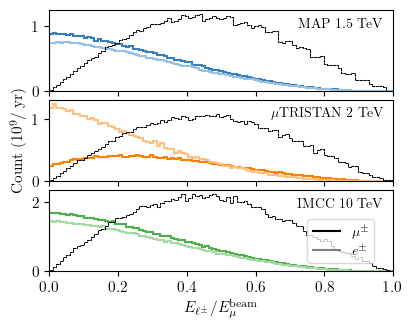

In [171]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4.44, 3.4))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
yunits=1e9
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
bins = np.linspace(0,1,100)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2

# First subplot
ax1 = plt.subplot(gs[0])
ax1.hist(mus_mokhov['E'] / Emu_mokhov, weights=mus_mokhov['w'] / yunits,
         bins=bins, histtype='step', label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, lw=LW)
ax1.hist(es_mokhov['E'] / Emu_mokhov, weights=es_mokhov['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder=2, lw=LW)
# ax1.hist(nus_mokhov['Enumu'] / Emu_mokhov, weights=nus_mokhov['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax1.hist(nus_mokhov['Enue'] / Emu_mokhov, weights=nus_mokhov['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax1.hist(nus_mokhov['E'] / Emu_mokhov, weights=nus_mokhov['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.hist(mus_muT['E'] / Emu_mutristan, weights=mus_muT['w'] / yunits,
         bins=bins, histtype='step', label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, lw=LW)
ax2.hist(es_muT['E'] / Emu_mutristan, weights=es_muT['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder=2, lw=LW)
# ax2.hist(nus_muT['Enumu'] / Emu_mutristan, weights=nus_muT['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax2.hist(nus_muT['Enue'] / Emu_mutristan, weights=nus_muT['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax2.hist(nus_muT['E'] / Emu_mutristan, weights=nus_muT['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.hist(mus_mucol['E'] / Emu_mucols2, weights=mus_mucol['w'] / yunits,
         bins=bins, histtype='step', label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, lw=LW)
ax3.hist(es_mucol['E'] / Emu_mucols2, weights=es_mucol['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder=2, lw=LW)
# ax3.hist(nus_mucol['Enumu'] / Emu_mucols2, weights=nus_mucol['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax3.hist(nus_mucol['Enue'] / Emu_mucols2, weights=nus_mucol['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax3.hist(nus_mucol['E'] / Emu_mucols2, weights=nus_mucol['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)


# ax1.hist(sim_mokhov.cco.pnumu[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights/sim_mokhov.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = 'Mokhov 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW, ls=LS)
# ax1.hist(sim_mokhov.cco.pnue[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights/sim_mokhov.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW, ls=LS)

# ax2.hist(sim_muTs.cco.pnumu[:,0]/Emu_mutristan, weights = sim_muTs.cco.weights/sim_muTs.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = '$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW, ls=LS)
# ax2.hist(sim_muTs.cco.pnue[:,0]/Emu_mutristan, weights = sim_muTs.cco.weights/sim_muTs.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW, ls=LS)

# ax3.hist(sim_mucol.cco.pnumu[:,0]/Emu_mucols2, weights = sim_mucol.cco.weights/sim_mucol.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW, ls=LS)
# ax3.hist(sim_mucol.cco.pnue[:,0]/Emu_mucols2, weights = sim_mucol.cco.weights/sim_mucol.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW, ls=LS)


ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'${E_{\ell^\pm}}/{E_\mu^{\rm beam}}$')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=10, verticalalignment='top', horizontalalignment='right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
# lighter_line = plt.Line2D([], [], color='black', lw=LW*0.5, ls=LS, label=r'$\nu/\bar\nu$')
# leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.75, 0.1), title='', fontsize=10, frameon=True, framealpha=0.5)
leg2 = ax3.legend(handles=[dark_line, light_line], loc=(0.75, 0.1), title='', fontsize=10, frameon=True, framealpha=0.75)

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax3.set_xlim(0, 1)

# Adjust labels and layout
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/lepton_energy.pdf', bbox_inches = 'tight', dpi = 500)

In [182]:
def get_angle(df):
    return np.arccos(df['pz']/np.sqrt(df['px']**2 + df['py']**2 + df['pz']**2))

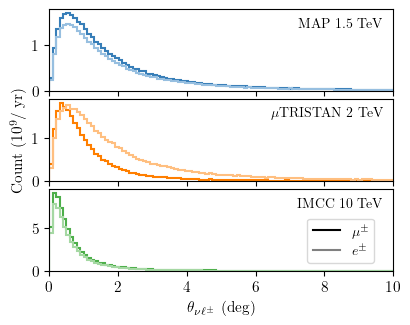

In [227]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4.44, 3.4))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)

bins = np.linspace(0,10,100)
yunits=1e9
xunits = 180/np.pi

kwargs = {'histtype': 'step', 'lw': LW, 'bins': bins, 'zorder': 2, 'cumulative': False, 'density': False}
# First subplot
ax1 = plt.subplot(gs[0])
h1,b1,_= ax1.hist(get_angle(mus_mokhov)*xunits, weights=mus_mokhov['w'] / yunits,
         label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], **kwargs)
ax1.hist(get_angle(es_mokhov)*xunits, weights=es_mokhov['w'] / yunits,
         color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), **kwargs)

# Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
h2,b2,_= ax2.hist(get_angle(mus_muT)*xunits, weights=mus_muT['w'] / yunits,
         label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], **kwargs)
ax2.hist(get_angle(es_muT)*xunits, weights=es_muT['w'] / yunits,
         color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), **kwargs)

# Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
h3,b3,_= ax3.hist(get_angle(mus_mucol)*xunits, weights=mus_mucol['w'] / yunits,
         label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], **kwargs)
ax3.hist(get_angle(es_mucol)*xunits, weights=es_mucol['w'] / yunits,
         color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), **kwargs)

ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'$\theta_{\nu\ell^\pm}$ (deg)')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=10, verticalalignment='top', horizontalalignment='right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
# lighter_line = plt.Line2D([], [], color='black', lw=LW*0.5, ls=LS, label=r'$\nu/\bar\nu$')
# leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.75, 0.1), title='', fontsize=10, frameon=True, framealpha=0.5)
leg2 = ax3.legend(handles=[dark_line, light_line], loc=(0.75, 0.1), title='', fontsize=10, frameon=True, framealpha=0.75)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(bins.min(), bins.max()) 
    # ax.hlines(0.9, 0, 6, color = 'black', lw = 1, ls = '--')

# Adjust labels and layout
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/lepton_angles.pdf', bbox_inches = 'tight', dpi = 500)

In [221]:
print(b1[np.argmin(np.abs(h1 - 0.67))], b1[np.argmin(np.abs(h1 - 0.9))])
print(b2[np.argmin(np.abs(h2 - 0.67))], b2[np.argmin(np.abs(h2 - 0.9))])
print(b3[np.argmin(np.abs(h3 - 0.67))], b3[np.argmin(np.abs(h3 - 0.9))])

1.9191919191919191 4.343434343434343
1.1111111111111112 2.4242424242424243
0.6060606060606061 1.7171717171717171


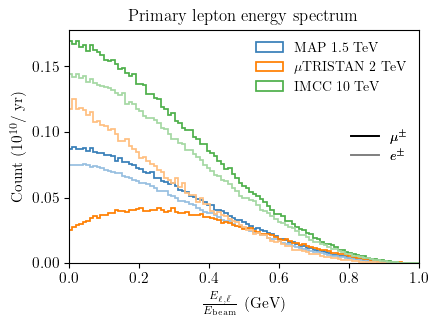

In [172]:
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
bins = np.linspace(0,1,100)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2


light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()

ax.hist(mus_mokhov['E']/Emu_mokhov, weights = mus_mokhov['w']/1e10, bins = bins, histtype = 'step', label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW)
ax.hist(es_mokhov['E']/Emu_mokhov, weights = es_mokhov['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW)


ax.hist(mus_muT['E']/Emu_mutristan, weights = mus_muT['w']/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW)
ax.hist(es_muT['E']/Emu_mutristan, weights = es_muT['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW)

ax.hist(mus_mucol['E']/Emu_mucols2, weights = mus_mucol['w']/1e10, bins = bins, histtype = 'step', label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW)
ax.hist(es_mucol['E']/Emu_mucols2, weights = es_mucol['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW)

# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\frac{E_{\ell,\bar{\ell}}}{E_{\rm beam}}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
# plt.xscale('log')
ax.set_xlim(bins.min(), bins.max())
ax.set_title(r'Primary lepton energy spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

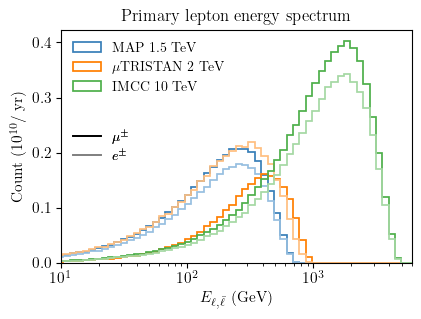

In [356]:
bins = np.logspace(np.log10(0.1), np.log10(10000), 100)

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()

ax.hist(mus_mokhov['E'], weights = mus_mokhov['w']/1e10, bins = bins, histtype = 'step', label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW)
ax.hist(es_mokhov['E'], weights = es_mokhov['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW)


ax.hist(mus_muT['E'], weights = mus_muT['w']/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW)
ax.hist(es_muT['E'], weights = es_muT['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW)

ax.hist(mus_mucol['E'], weights = mus_mucol['w']/1e10, bins = bins, histtype = 'step', label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW)
ax.hist(es_mucol['E'], weights = es_mucol['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW)

# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\ell,\bar{\ell}}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
plt.xscale('log')
ax.set_xlim(10,0.6*10**4)
ax.set_title(r'Primary lepton energy spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

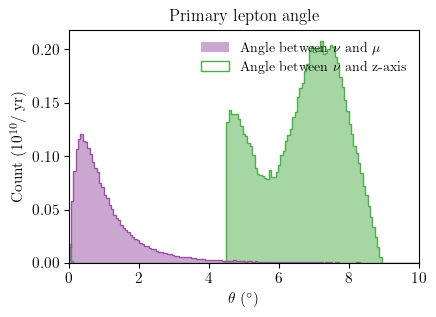

In [361]:
fig, ax = pt.std_fig()

bins = np.linspace(0, 10, 150)

# IMC
# ax.hist(pd.concat([theta[1], theta[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[5], zorder = 2, lw=LW*0.75)
# ax.hist(pd.concat([theta[1], theta[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'stepfilled', color = pt.cblind_safe_wheel[5], zorder = 2, lw=0, alpha=0.5, label=r'Angle between $\mu$ and $\ell$')

# ax.hist(theta[0], weights=mus_mucol['w']/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[5], zorder = 2, lw=LW*0.75)
# ax.hist(theta[0], weights=mus_mucol['w']/1e10, bins = bins, histtype = 'stepfilled', color = pt.cblind_safe_wheel[5], zorder = 2, lw=0, alpha=0.5, label=r'Angle between $\nu$ and $\mu$')

# ax.hist(np.arccos(cost_mucol)*180/np.pi, weights = w_mucol/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 1, label=r'Angle between $\nu$ and z-axis')
# ax.hist(np.arccos(cost_mucol)*180/np.pi, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# MOKHOV
# ax.hist(theta[2], weights=mus_mokhov['w']/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[5], zorder = 2, lw=LW*0.75)
# ax.hist(theta[2], weights=mus_mokhov['w']/1e10, bins = bins, histtype = 'stepfilled', color = pt.cblind_safe_wheel[5], zorder = 2, lw=0, alpha=0.5, label=r'Angle between $\nu$ and $\mu$')

# ax.hist(np.arccos(cost_mokhov)*180/np.pi, weights = w_mokhov/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 1, label=r'Angle between $\nu$ and z-axis')
# ax.hist(np.arccos(cost_mokhov)*180/np.pi, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)


ax.hist(theta[4], weights=mus_muT['w']/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[5], zorder = 2, lw=LW*0.75)
ax.hist(theta[4], weights=mus_muT['w']/1e10, bins = bins, histtype = 'stepfilled', color = pt.cblind_safe_wheel[5], zorder = 2, lw=0, alpha=0.5, label=r'Angle between $\nu$ and $\mu$')

ax.hist(np.arccos(cost_muTs)*180/np.pi, weights = w_muTs/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 1, label=r'Angle between $\nu$ and z-axis')
ax.hist(np.arccos(cost_muTs)*180/np.pi, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper right')


ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
# ax.set_yscale('log')
ax.set_xlim(0,10)
# ax.set_ylim(1e-2,4)
ax.set_title(r'Primary lepton angle', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT_IMCC.jpg', bbox_inches = 'tight', dpi = 500)

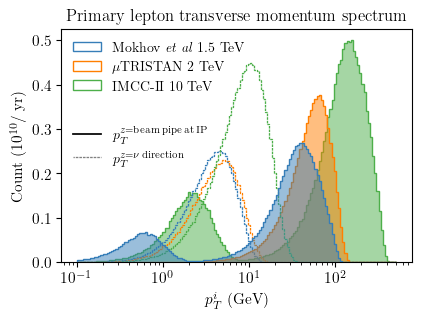

In [269]:
fig, ax = pt.std_fig()

bins = np.geomspace(0.1, 500, 150)

ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3)
ax.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3)

ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2)
ax.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2)

ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1)
ax.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$p_T^{i}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

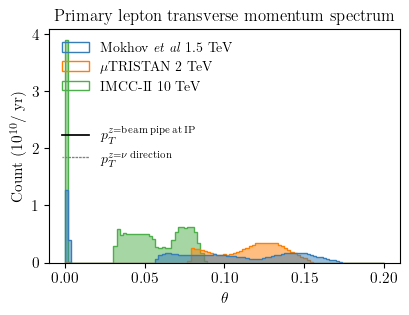

In [302]:
fig, ax = pt.std_fig()

bins = np.linspace(0., 0.2, 100)

# ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(np.arcsin(np.sqrt(1 - cost_mokhov**2)), weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3)
ax.hist(np.arcsin(np.sqrt(1 - cost_mokhov**2)), weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3)

# ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(np.arcsin(np.sqrt(1 - cost_muTs**2)), weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2)
ax.hist(np.arcsin(np.sqrt(1 - cost_muTs**2)), weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2)

# ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(np.arcsin(np.sqrt(1 - cost_mucol**2)), weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1)
ax.hist(np.arcsin(np.sqrt(1 - cost_mucol**2)), weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

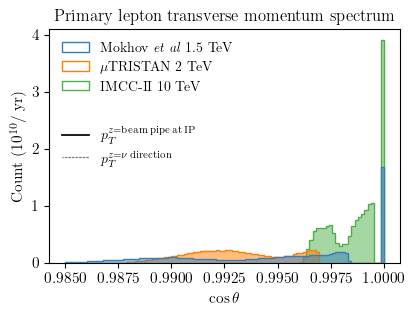

In [291]:
fig, ax = pt.std_fig()

bins = np.geomspace(0.985, 1, 100)

# ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(cost_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3)
ax.hist(cost_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3)

# ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(cost_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2)
ax.hist(cost_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2)

# ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(cost_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1)
ax.hist(cost_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

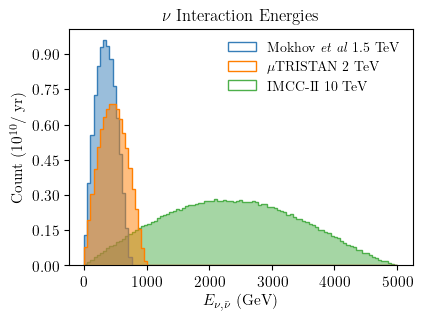

In [270]:
bins = np.linspace(0,5e3, 100)
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'step', color = pt.cblind_safe_wheel[0], label = r'Mokhov \emph{et al} 1.5 TeV', bins = bins, zorder = 2)
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'stepfilled', alpha=0.5, color = pt.cblind_safe_wheel[0], bins = bins, lw=0, zorder = 2)

plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'step', color = pt.cblind_safe_wheel[1], label = r'$\mu$TRISTAN 2 TeV', bins = bins, zorder = 3)
plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'stepfilled', alpha=0.5, color = pt.cblind_safe_wheel[1], bins = bins, lw=0, zorder = 3)

plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'step', color = pt.cblind_safe_wheel[2], label = r'IMCC-II 10 TeV', bins = bins, zorder = 1)
plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'stepfilled', alpha=0.5, color = pt.cblind_safe_wheel[2], bins = bins, lw=0, zorder = 1)


#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(70))  # Adjust the interval as needed
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.15))

plt.xlabel(r'$E_{\nu, \bar{\nu}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.legend(loc = 'upper right')
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'$\nu$ Interaction Energies')
plt.savefig('plots_Luc/posterplots/nu_e.jpg', bbox_inches = 'tight', dpi = 500)

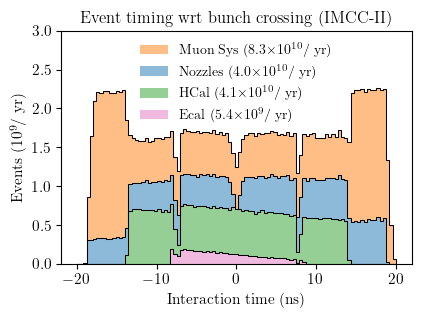

In [177]:
fig, ax = pt.std_fig()

bins = np.linspace(-20, 20, 100)
data = [timesms*1e9, timeshc*1e9, timesno*1e9, timesec*1e9]
weights = [wms/1e9, whc/1e9, wno/1e9, wec/1e9]
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:pink']
labels = [r'Muon Sys (8.3$\times10^{10}$/ yr)', r'HCal (4.1$\times10^{10}$/ yr)', r'Nozzles (4.0$\times10^{10}$/ yr)', r'Ecal (5.4$\times10^{9}$/ yr)']

order = [3,1,2,0]
data = [data[order[0]], data[order[1]], data[order[2]], data[order[3]]]
weights = [weights[order[0]], weights[order[1]], weights[order[2]], weights[order[3]]]
colors = [colors[order[0]], colors[order[1]], colors[order[2]], colors[order[3]]]
labels = [labels[order[0]], labels[order[1]], labels[order[2]], labels[order[3]]]

ax.hist(data, weights = weights, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = colors, label = labels, stacked = True, alpha=0.5, lw=0)
ax.hist(data, weights = weights, bins = bins, histtype = 'step', edgecolor = 'black', color = colors, stacked = True, alpha=1, lw=0.75)

ax.legend(loc = 'upper center')
ax.set_ylabel(r'Events ($10^{9}$/ yr)')
ax.set_xlabel('Interaction time (ns)')
ax.set_ylim(0,3)
ax.set_title(r'Event timing wrt bunch crossing (IMCC-II)')
fig.savefig('plots_Luc/posterplots/nu_t.jpg', bbox_inches = 'tight', dpi = 500)

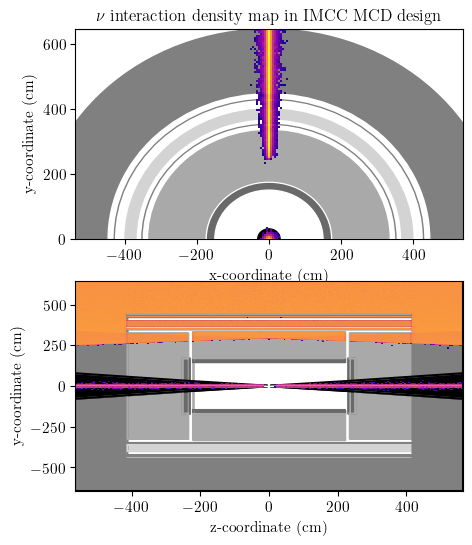

In [297]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(2, 1, figsize = (5,6))
collider = muTs

hist1 = collider.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, cmin = None)
hist2 = collider.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, cmin = None)

vmin=1
vmax=max(hist1[0].max(), hist2[0].max())

axs[0].clear()
axs[1].clear()
hist1 = collider.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, vmin = vmin, vmax = vmax, cmin = 1, title = False)
hist2 = collider.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, vmin = vmin, vmax = vmax, cmin = 1)

# Add a colorbar that spans both subplots
axs[0].set_title(r'$\nu$ interaction density map in IMCC MCD design')
# cbar_ax = fig.add_subplot(111)  # Create a new subplot for the colorbar
# cbar = fig.colorbar(hist1[3], ax=[axs[0], axs[1]], cax=cbar_ax)  # Create the colorbar
# plt.subplots_adjust(hspace=0.25)
# cbar.set_label(r'$N_{\rm events}$ (/ yr)')

# Adjust the position of the colorbar to span both subplots
# fig.subplots_adjust(right=0.90)  # Adjust the right side to make space for the colorbar
cbar_ax.set_position([0.75, 0.55, 0.02, 0.3])  # [left, bottom, width, height]
plt.savefig('plots_Luc/posterplots/nu_d.jpg', bbox_inches = 'tight', dpi = 500)

In [114]:
# sim = dg.SimulateDetector(param = 'mutristan s', N_evals = 1e6)
# sd1 = sim.run(collision = 'mu+mu+', Lss = 75)
# sim = dg.SimulateDetector(param = 'mokhov', N_evals = 1e6)
# sd = sim.run(collision = 'mu+mu-', Lss = 50)
sim = dg.SimulateDetector(param = 'mucol s2', N_evals = 1e6)
sd2 = sim.run(collision = 'mu+mu-', Lss = 100)

Succesfully simulated decays:
IMCC-II parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 25.6 s.
Successfully simulated neutrino event rates within Det v2:
IMCC-II (μ+μ-) at L = 100.00 m.
Total count: 1.69e+11 events; took 23.3 s.



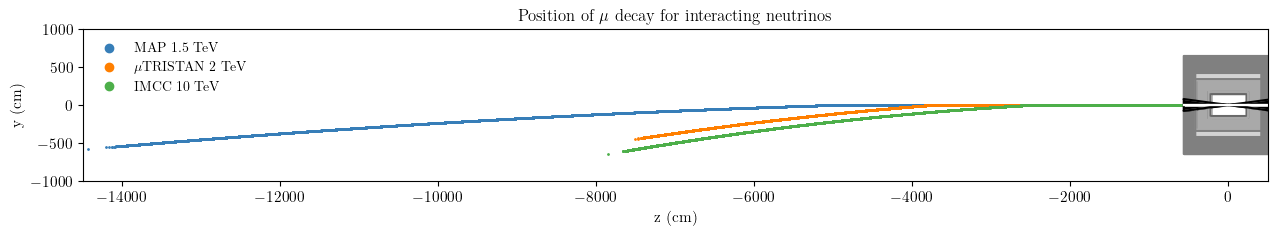

In [294]:
fig, ax = pt.std_fig(figsize=(15,2))
ax.scatter((sd2.sims[0]).dec_pos[:,:,2], (sd2.sims[0]).dec_pos[:,:,1], s = 1, color = pt.cblind_safe_wheel[0])
ax.scatter((sd1.sims[0]).dec_pos[:,:,2], (sd1.sims[0]).dec_pos[:,:,1], s = 1,  color = pt.cblind_safe_wheel[1])
ax.scatter((sd.sims[0]).dec_pos[:,:,2], (sd.sims[0]).dec_pos[:,:,1], s = 1, color = pt.cblind_safe_wheel[2])
ax.scatter(1000,1000, color = pt.cblind_safe_wheel[0], label = r'MAP 1.5 TeV')
ax.scatter(1000,1000, color = pt.cblind_safe_wheel[1], label = r'$\mu$TRISTAN 2 TeV')
ax.scatter(1000,1000, color = pt.cblind_safe_wheel[2], label = r'IMCC 10 TeV')
dg.plot_det('det_v2', ax = ax)
ax.set_ylim(-1000,1000)
ax.set_xlim(-14500, 500)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')
ax.legend()
ax.set_title(r'Position of $\mu$ decay for interacting neutrinos')
plt.savefig('plots_Luc/posterplots/mu_p.jpg', bbox_inches = 'tight', dpi = 500)

In [281]:
from DarkNews import const
1/1e4*const.invGeV2_to_cm2

3.893793721116296e-32

In [122]:
from scipy.optimize import curve_fit
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

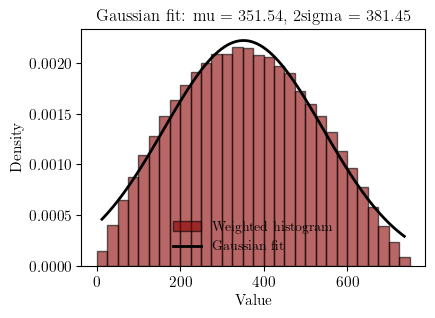

In [124]:
data = np.array(E_mokhov)
weights = np.array(w_mokhov)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='darkred', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, 2sigma = {2*sigma:.2f}')
plt.legend()

plt.show()


351.5370793110643 190.7226917976184


(10, 100000)

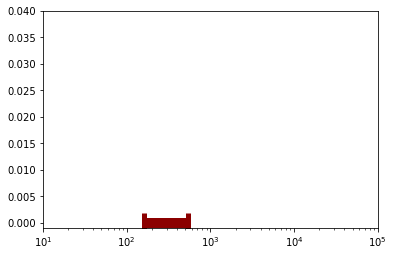

In [67]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkred', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

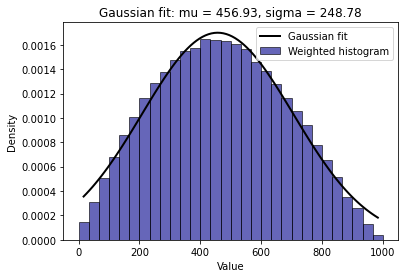

In [68]:
data = np.array(E_muTs)
weights = np.array(w_muTs)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='darkblue', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


456.9308765237521 248.78380552194864


(10, 100000)

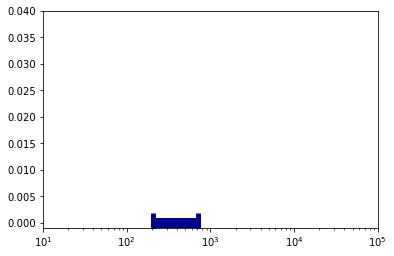

In [70]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkblue', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

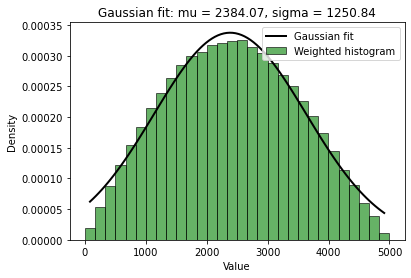

In [71]:
data = np.array(E_mucol)
weights = np.array(w_mucol)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='green', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


2384.0726979412093 1250.8387409969005


(10, 100000)

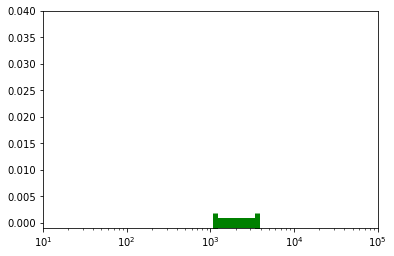

In [72]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'green', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)